In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_blobs,make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

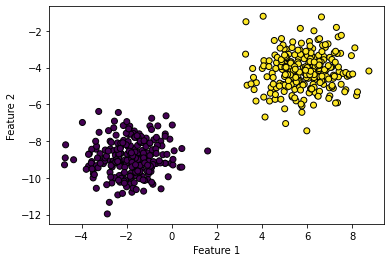

In [17]:
X, y = make_blobs(n_samples=500, centers=2, cluster_std=1, center_box=(-10.0, 10.0), n_features=2,random_state=40)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32); y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32);  y_test_tensor  = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [20]:
class BasicClassifier(nn.Module):
    def __init__(self):
        super(BasicClassifier, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

model = BasicClassifier()

In [21]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [22]:
device = 'cpu'

In [23]:
model = model.to(device)
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

## Train Model

In [24]:
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/5000], Loss: 0.6876
Epoch [20/5000], Loss: 0.4598
Epoch [30/5000], Loss: 0.3415
Epoch [40/5000], Loss: 0.2616
Epoch [50/5000], Loss: 0.2046
Epoch [60/5000], Loss: 0.1634
Epoch [70/5000], Loss: 0.1332
Epoch [80/5000], Loss: 0.1107
Epoch [90/5000], Loss: 0.0937
Epoch [100/5000], Loss: 0.0805
Epoch [110/5000], Loss: 0.0702
Epoch [120/5000], Loss: 0.0618
Epoch [130/5000], Loss: 0.0550
Epoch [140/5000], Loss: 0.0494
Epoch [150/5000], Loss: 0.0448
Epoch [160/5000], Loss: 0.0408
Epoch [170/5000], Loss: 0.0374
Epoch [180/5000], Loss: 0.0345
Epoch [190/5000], Loss: 0.0320
Epoch [200/5000], Loss: 0.0297
Epoch [210/5000], Loss: 0.0278
Epoch [220/5000], Loss: 0.0261
Epoch [230/5000], Loss: 0.0245
Epoch [240/5000], Loss: 0.0231
Epoch [250/5000], Loss: 0.0219
Epoch [260/5000], Loss: 0.0208
Epoch [270/5000], Loss: 0.0197
Epoch [280/5000], Loss: 0.0188
Epoch [290/5000], Loss: 0.0180
Epoch [300/5000], Loss: 0.0172
Epoch [310/5000], Loss: 0.0164
Epoch [320/5000], Loss: 0.0158
Epoch [330/5000],

### Evaluation

In [25]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())
    print(f'Accuracy: {100*accuracy:.2f}')

Accuracy: 100.00


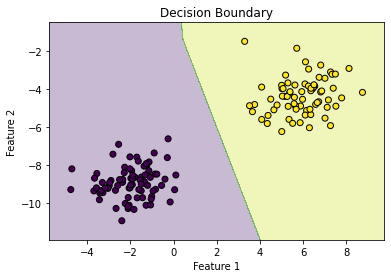

In [26]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = (Z > 0.5).float()
    Z = Z.reshape(xx.shape).numpy()

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_test, y_test, model)

## Harder Example XD

In [34]:
X, y = make_moons(n_samples=10000, shuffle=True, noise=0.2, random_state=None)

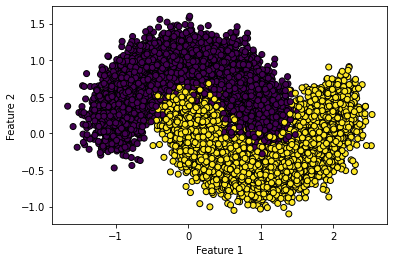

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [38]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32); y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32);  y_test_tensor  = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [39]:
class AdvancedClassifier(nn.Module):
    def __init__(self):
        super(AdvancedClassifier, self).__init__()
        self.sequence = nn.Sequential(
            nn.Linear(2, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.sequence(x)
        return out

model = AdvancedClassifier()

In [40]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [42]:
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/5000], Loss: 0.5903
Epoch [20/5000], Loss: 0.5256
Epoch [30/5000], Loss: 0.4819
Epoch [40/5000], Loss: 0.4489
Epoch [50/5000], Loss: 0.4225
Epoch [60/5000], Loss: 0.4009
Epoch [70/5000], Loss: 0.3829
Epoch [80/5000], Loss: 0.3677
Epoch [90/5000], Loss: 0.3547
Epoch [100/5000], Loss: 0.3435
Epoch [110/5000], Loss: 0.3337
Epoch [120/5000], Loss: 0.3250
Epoch [130/5000], Loss: 0.3171
Epoch [140/5000], Loss: 0.3100
Epoch [150/5000], Loss: 0.3035
Epoch [160/5000], Loss: 0.2975
Epoch [170/5000], Loss: 0.2919
Epoch [180/5000], Loss: 0.2867
Epoch [190/5000], Loss: 0.2818
Epoch [200/5000], Loss: 0.2772
Epoch [210/5000], Loss: 0.2728
Epoch [220/5000], Loss: 0.2687
Epoch [230/5000], Loss: 0.2647
Epoch [240/5000], Loss: 0.2608
Epoch [250/5000], Loss: 0.2570
Epoch [260/5000], Loss: 0.2526
Epoch [270/5000], Loss: 0.2480
Epoch [280/5000], Loss: 0.2440
Epoch [290/5000], Loss: 0.2403
Epoch [300/5000], Loss: 0.2367
Epoch [310/5000], Loss: 0.2332
Epoch [320/5000], Loss: 0.2298
Epoch [330/5000],

In [43]:
model.eval()
model = model.cpu()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor.cpu())
    y_pred = (y_pred_probs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())
    print(f'Accuracy: {100*accuracy:.4f}')

Accuracy: 97.0000


In [45]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = (Z > 0.5).float()
    Z = Z.reshape(xx.shape).numpy()

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

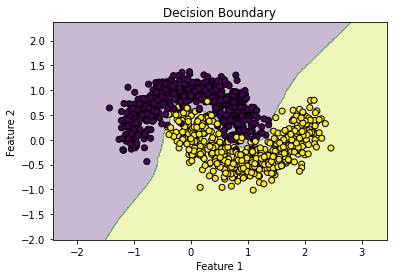

In [46]:
plot_decision_boundary(X_test, y_test, model.cpu())

This is much better now ;)